# Model Comparison Visualization

**Objective**: Clean visualizations comparing baselines vs graph-based models.

**Plots**:
1. AUC comparison: Baselines (left) vs GNN models with error bars (right)
2. Precision on positive class (all models)
3. Recall on positive class (all models)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 6)

## Load All Results

In [12]:
# Define result directories
results_dirs = {
    'Temporal GCN': Path('../../results/evolve_gcn_multi_seed'),
    'Static GCN': Path('../../results/static_gcn_multi_seed'),
    'MLP + Graph Features': Path('../../results/graph_features_baseline'),
    'Logistic Regression': Path('../../results/baselines/logistic_regression'),
    'Random Forest': Path('../../results/baselines/random_forest'),
    'XGBoost': Path('../../results/baselines/xgboost')
}

# Categorize models
baseline_models = ['Logistic Regression', 'Random Forest', 'XGBoost', 'MLP + Graph Features']
gnn_models = ['Static GCN', 'Temporal GCN']

# Load summary statistics
all_models_summary = {}

for model_name, result_dir in results_dirs.items():
    # Try multi-seed format first
    csv_path = result_dir / 'multi_seed_summary_statistics.csv'
    if not csv_path.exists():
        csv_path = result_dir / 'summary_statistics.csv'
    
    if csv_path.exists():
        df = pd.read_csv(csv_path)
        df['model'] = model_name
        all_models_summary[model_name] = df
        print(f"✓ Loaded {model_name}")
    else:
        print(f"✗ Missing: {csv_path}")

combined_summary = pd.concat(all_models_summary.values(), ignore_index=True)
print(f"\nLoaded {len(combined_summary['model'].unique())} models")
print(f"K values: {sorted(combined_summary['K'].unique())}")

✓ Loaded Temporal GCN
✓ Loaded Static GCN
✓ Loaded MLP + Graph Features
✓ Loaded Logistic Regression
✓ Loaded Random Forest
✓ Loaded XGBoost

Loaded 6 models
K values: [np.int64(1), np.int64(3), np.int64(5), np.int64(7)]


## Plot 1: AUC Comparison (Baselines vs GNNs)

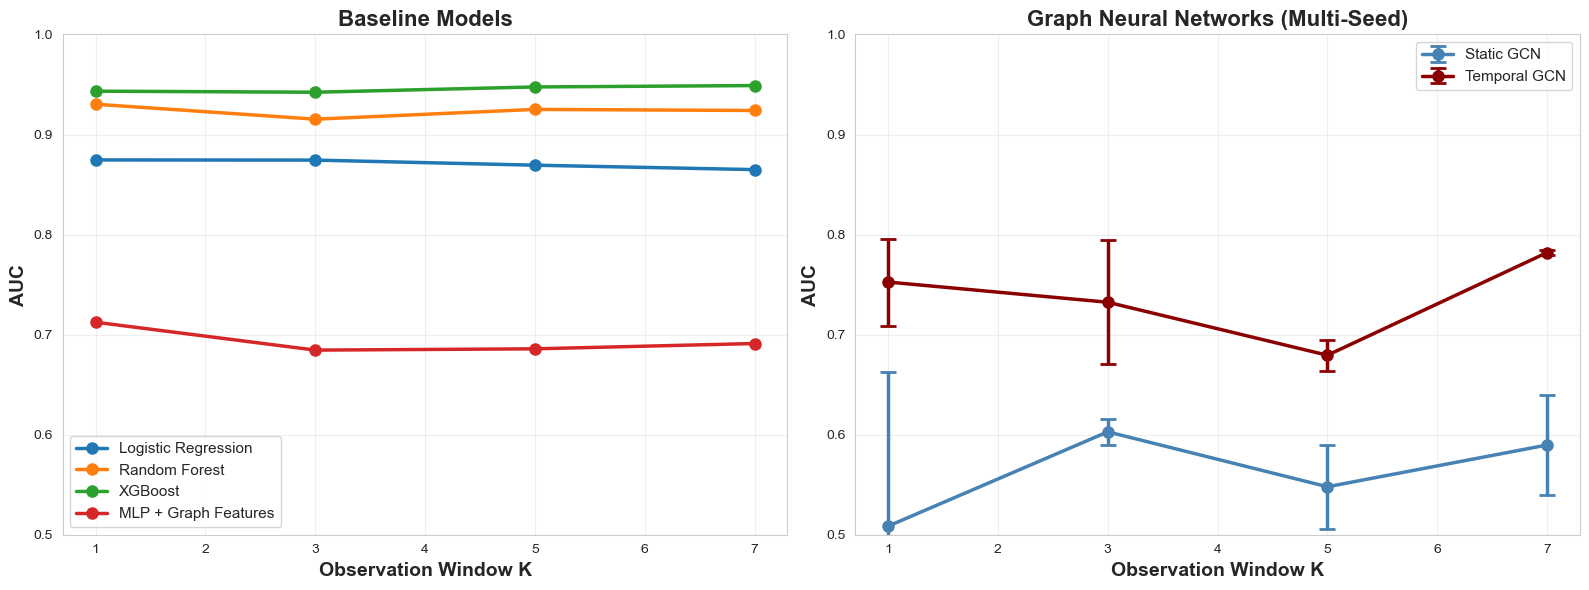

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Baselines (no error bars)
ax = axes[0]
baseline_data = combined_summary[combined_summary['model'].isin(baseline_models)]

for model_name in baseline_models:
    model_data = baseline_data[baseline_data['model'] == model_name].sort_values('K')
    ax.plot(
        model_data['K'],
        model_data['auc_mean'],
        marker='o',
        linewidth=2.5,
        markersize=8,
        label=model_name
    )

ax.set_xlabel('Observation Window K', fontsize=14, fontweight='bold')
ax.set_ylabel('AUC', fontsize=14, fontweight='bold')
ax.set_title('Baseline Models', fontsize=16, fontweight='bold')
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)
ax.set_ylim([0.5, 1.0])

# Right: GNN models (with error bars)
ax = axes[1]
gnn_data = combined_summary[combined_summary['model'].isin(gnn_models)]

colors = {'Static GCN': 'steelblue', 'Temporal GCN': 'darkred'}
for model_name in gnn_models:
    model_data = gnn_data[gnn_data['model'] == model_name].sort_values('K')
    ax.errorbar(
        model_data['K'],
        model_data['auc_mean'],
        yerr=model_data['auc_std'],
        marker='o',
        linewidth=2.5,
        markersize=8,
        capsize=6,
        capthick=2,
        label=model_name,
        color=colors[model_name]
    )

ax.set_xlabel('Observation Window K', fontsize=14, fontweight='bold')
ax.set_ylabel('AUC', fontsize=14, fontweight='bold')
ax.set_title('Graph Neural Networks (Multi-Seed)', fontsize=16, fontweight='bold')
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)
ax.set_ylim([0.5, 1.0])

# plt.suptitle('AUC Performance Comparison', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## Plot 2: Precision and Recall on Positive Class (All Models)

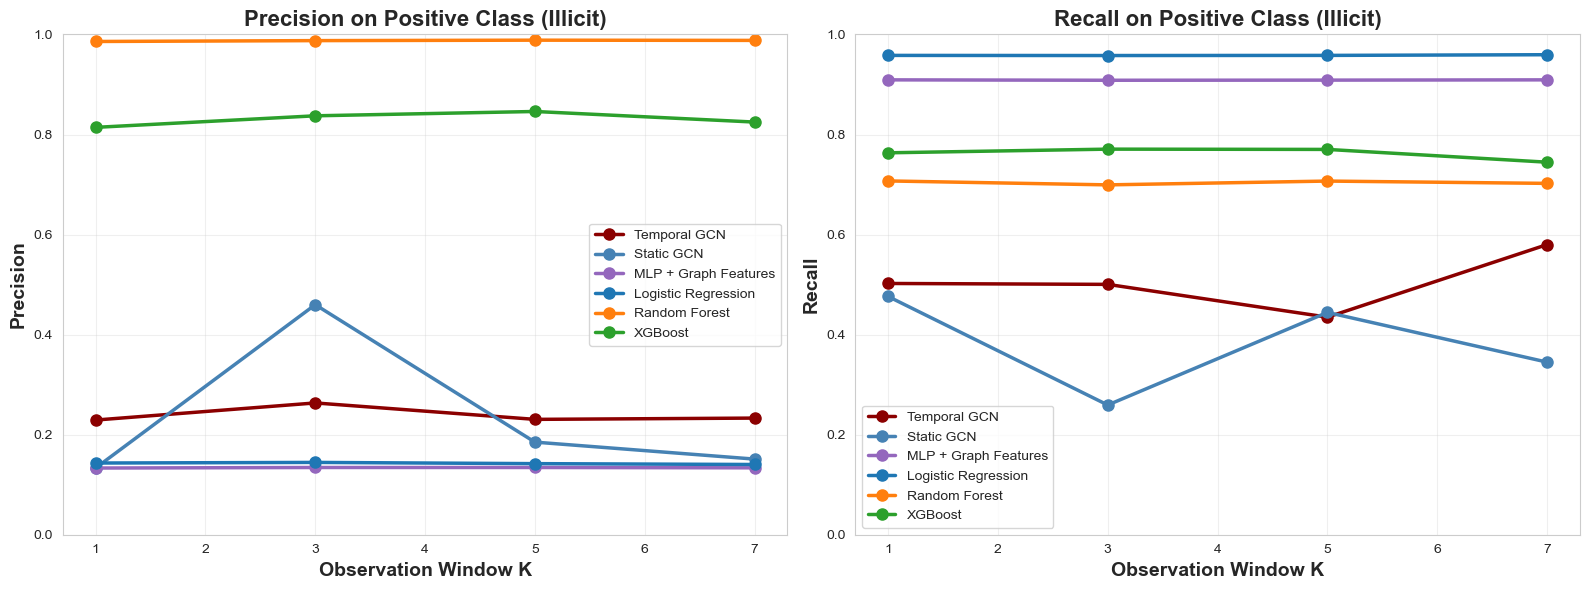

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define colors for all models
model_colors = {
    'Logistic Regression': 'tab:blue',
    'Random Forest': 'tab:orange',
    'XGBoost': 'tab:green',
    'MLP + Graph Features': 'tab:purple',
    'Static GCN': 'steelblue',
    'Temporal GCN': 'darkred'
}

# Left: Precision on positive class
ax = axes[0]
for model_name in results_dirs.keys():
    model_data = combined_summary[combined_summary['model'] == model_name].sort_values('K')
    ax.plot(
        model_data['K'],
        model_data['precision_mean'],
        marker='o',
        linewidth=2.5,
        markersize=8,
        label=model_name,
        color=model_colors.get(model_name, 'gray')
    )

ax.set_xlabel('Observation Window K', fontsize=14, fontweight='bold')
ax.set_ylabel('Precision', fontsize=14, fontweight='bold')
ax.set_title('Precision on Positive Class (Illicit)', fontsize=16, fontweight='bold')
ax.legend(fontsize=10, loc='best')
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1.0])

# Right: Recall on positive class
ax = axes[1]
for model_name in results_dirs.keys():
    model_data = combined_summary[combined_summary['model'] == model_name].sort_values('K')
    ax.plot(
        model_data['K'],
        model_data['recall_mean'],
        marker='o',
        linewidth=2.5,
        markersize=8,
        label=model_name,
        color=model_colors.get(model_name, 'gray')
    )

ax.set_xlabel('Observation Window K', fontsize=14, fontweight='bold')
ax.set_ylabel('Recall', fontsize=14, fontweight='bold')
ax.set_title('Recall on Positive Class (Illicit)', fontsize=16, fontweight='bold')
ax.legend(fontsize=10, loc='best')
ax.grid(True, alpha=0.3)
ax.set_ylim([0, 1.0])

# plt.suptitle('Precision and Recall on Positive Class (All Models)', fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

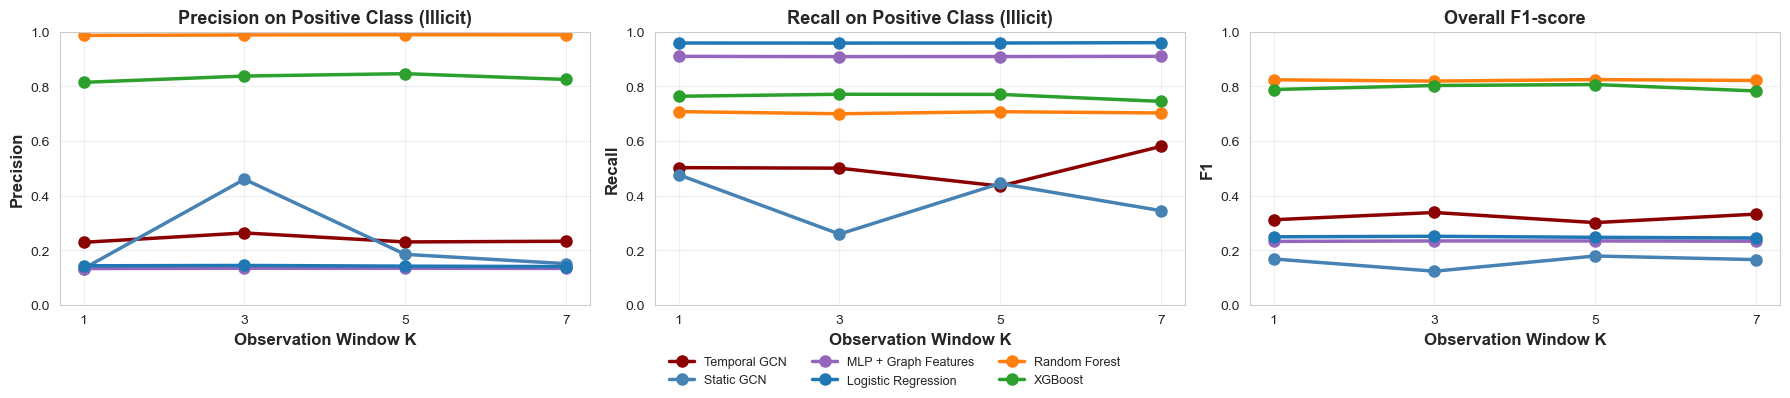

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Define colors for all models
model_colors = {
    'Logistic Regression': 'tab:blue',
    'Random Forest': 'tab:orange',
    'XGBoost': 'tab:green',
    'MLP + Graph Features': 'tab:purple',
    'Static GCN': 'steelblue',
    'Temporal GCN': 'darkred'
}

# (title, column_name) for positive class
metric_specs = [
    ("Precision on Positive Class (Illicit)", "precision_mean"),
    ("Recall on Positive Class (Illicit)", "recall_mean"),
    ("Overall F1-score", "f1_mean"),
]

for ax, (title, col) in zip(axes, metric_specs):
    for model_name in results_dirs.keys():
        model_data = (
            combined_summary[combined_summary['model'] == model_name]
            .sort_values('K')
        )

        ax.plot(
            model_data['K'],
            model_data[col],
            marker='o',
            linewidth=2.5,
            markersize=8,
            label=model_name,
            color=model_colors.get(model_name, 'gray')
        )

    ax.set_xlabel('Observation Window K', fontsize=12, fontweight='bold')
    ax.set_ylabel(col.split('_')[0].capitalize(), fontsize=12, fontweight='bold')
    ax.set_title(title, fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_ylim([0, 1.0])
    ax.set_xticks([1, 3, 5, 7])   # only show 1,3,5,7

# Figure-level legend underneath
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc='lower center',
    ncol=3,
    fontsize=9,
    frameon=False
)

plt.tight_layout(rect=[0, 0.08, 1, 1])  # make space at bottom for legend
plt.show()


## Summary Statistics Table

In [10]:
# Create summary table
summary_table = combined_summary.copy()
summary_table = summary_table.sort_values(['K', 'model'])

# Format with ± notation where applicable
summary_table['AUC'] = summary_table.apply(
    lambda x: f"{x['auc_mean']:.3f} ± {x['auc_std']:.3f}" if x['auc_std'] > 0 else f"{x['auc_mean']:.3f}",
    axis=1
)
summary_table['Precision'] = summary_table.apply(
    lambda x: f"{x['precision_mean']:.3f}",
    axis=1
)
summary_table['Recall'] = summary_table.apply(
    lambda x: f"{x['recall_mean']:.3f}",
    axis=1
)
summary_table['F1'] = summary_table.apply(
    lambda x: f"{x['f1_mean']:.3f} ± {x['f1_std']:.3f}" if x['f1_std'] > 0 else f"{x['f1_mean']:.3f}",
    axis=1
)

display_cols = ['model', 'K', 'AUC', 'Precision', 'Recall', 'F1']
display_table = summary_table[display_cols]

print("\n" + "="*100)
print("MODEL PERFORMANCE SUMMARY (Test Set)")
print("="*100)
print(display_table.to_string(index=False))

# Best performers per K
print("\n" + "="*100)
print("BEST PERFORMERS BY K")
print("="*100)
best_auc_per_k = combined_summary.loc[combined_summary.groupby('K')['auc_mean'].idxmax()]
print("\nBest AUC per K:")
print(best_auc_per_k[['K', 'model', 'auc_mean', 'auc_std']].to_string(index=False))

best_f1_per_k = combined_summary.loc[combined_summary.groupby('K')['f1_mean'].idxmax()]
print("\nBest F1 per K:")
print(best_f1_per_k[['K', 'model', 'f1_mean', 'f1_std']].to_string(index=False))


MODEL PERFORMANCE SUMMARY (Test Set)
               model  K   AUC Precision Recall    F1
 Logistic Regression  1 0.875     0.143  0.958 0.249
MLP + Graph Features  1 0.712     0.133  0.909 0.233
       Random Forest  1 0.930     0.986  0.707 0.824
          Static GCN  1   nan     0.133  0.476   nan
        Temporal GCN  1   nan     0.229  0.502   nan
             XGBoost  1 0.943     0.814  0.763 0.788
 Logistic Regression  3 0.874     0.145  0.958 0.251
MLP + Graph Features  3 0.685     0.134  0.908 0.234
       Random Forest  3 0.915     0.988  0.699 0.819
          Static GCN  3   nan     0.460  0.259   nan
        Temporal GCN  3   nan     0.263  0.500   nan
             XGBoost  3 0.942     0.837  0.771 0.803
 Logistic Regression  5 0.869     0.142  0.958 0.247
MLP + Graph Features  5 0.686     0.134  0.909 0.234
       Random Forest  5 0.925     0.989  0.707 0.824
          Static GCN  5   nan     0.185  0.444   nan
        Temporal GCN  5   nan     0.231  0.435   nan
        

## Save Plots

In [ ]:
# Optional: Save high-quality figures
output_dir = Path('../../results/figures')
output_dir.mkdir(parents=True, exist_ok=True)

print(f"Figures can be saved to: {output_dir}")
print("To save, uncomment the plt.savefig() lines in the plotting cells above.")